In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("OK — Librerías cargadas correctamente")

OK — Librerías cargadas correctamente


# Reto 1: Relación entre los datos de entrada

In [3]:
df_atletas = pd.read_csv("data/atletas.csv")    # Cambia por el nombre real
df_medallas = pd.read_csv("data/medallas.csv")  # Idem

print("Atletas")
print(df_atletas.head())
print("\nMedallas")
print(df_medallas.head())

Atletas
   ID                      Name Sex   Age  Height  Weight            Team  NOC
0   1                 A Dijiang   M  24.0   180.0    80.0           China  CHN
1   2                  A Lamusi   M  23.0   170.0    60.0           China  CHN
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark  DEN
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands  NED

Medallas
   ID        Games  Year  Season       City          Sport  \
0   1  1992 Summer  1992  Summer  Barcelona     Basketball   
1   2  2012 Summer  2012  Summer     London           Judo   
2   3  1920 Summer  1920  Summer  Antwerpen       Football   
3   4  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4   5  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2  

### Explicación de que aporta cada tabla y cómo se relacionan
La primera tabla (atletas.csv) recoge información personal y básica de cada deportista: un ID único, nombre, sexo, edad, altura, peso, país/equipo y el NOC (comité olímpico nacional).  
La segunda tabla (medallas.csv) describe cada participación olímpica: enlaza el mismo ID de atleta con la edición de los Juegos (año, ciudad, verano/invierno), el deporte, el evento concreto y el tipo de medalla, si la obtuvo.  
Ambas se relacionan a través de la columna ID: gracias a ella podemos unir los datos personales del atleta con sus resultados deportivos en cada edición de los Juegos.

### Muestra un listado de ejemplo (5–10 filas) con: nombre del atleta, país, tipo de juegos, años en los que participó y medallas obtenidas en cada año

In [4]:
df_JJOO = pd.merge(df_atletas, df_medallas, on='ID', how='inner')

# Limpiar datos: filtrar solo filas donde se obtuvo medalla (Medal no es NaN)
df_JJOO_medallas = df_JJOO[df_JJOO['Medal'].notna()]

resumen = (
    df_JJOO_medallas
    .groupby(['Name', 'Team', 'Season', 'Year'])
    .agg(
        Medallas_Obtenidas = ('Medal', 'count')  # Cuenta el número de medallas por grupo
    )
    .reset_index()
)
print(resumen.head(10))

                    Name                                            Team  \
0              A. Albert  Union des Socits Franais de Sports Athletiques   
1              A. Dubois                                       Gitana-21   
2  A. Joshua "Josh" West                                   Great Britain   
3               A. Lawry                                        Cornwall   
4            A. M. Woods          St. Louis Amateur Athletic Association   
5            A. R. Upton           Brussels Swimming and Water Polo Club   
6           A. Willcocks                                        Cornwall   
7             Aage Birch                                           Snude   
8      Aage Ernst Larsen                                         Denmark   
9       Aage Hy Pedersen                                         Denmark   

   Season  Year  Medallas_Obtenidas  
0  Summer  1900                   1  
1  Summer  1900                   2  
2  Summer  2008                   1  
3  Summer  

### Indica 3 preguntas que no se podrían responder usando solo una de las tablas
1. Cantidad de medallas por país: ¿Qué país ha ganado más medallas en total?  
2. Edad promedio de los medallistas: ¿Cuál es la edad promedio de los atletas que han ganado medallas por país?  
3. Participación por deporte: ¿Cuántos atletas de cada país han participado en deportes específicos habiendo ganado medallas?

###  Haz un gráfico de barras apiladas con el nº de participaciones por país para los 10 países con más participaciones, separando Verano/Invierno. Justifica por qué barras apiladas es una buena elección (o propón otro tipo de gráfica y justifícala)

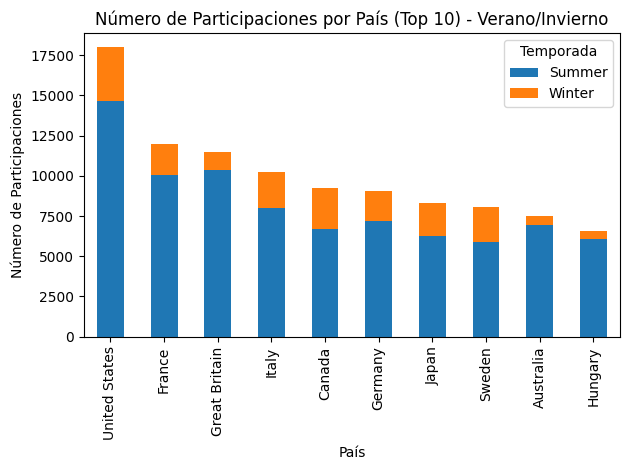

In [6]:
# Número de participaciones por país para los 10 países con más participaciones, separando Verano/Invierno
participaciones = (
    df_JJOO
    .groupby(['Team', 'Season'])
    .size()
    .reset_index(name='Num_Participaciones')
)
top10_paises = (
    participaciones
    .groupby('Team')['Num_Participaciones']
    .sum()
    .nlargest(10)
    .index
)
participaciones_top10 = participaciones[participaciones['Team'].isin(top10_paises)]
# Gráfico de barras apiladas ordenadas de mayor a menor
pivot_participaciones = participaciones_top10.pivot(index='Team', columns='Season', values='Num_Participaciones').fillna(0)
pivot_participaciones = pivot_participaciones.loc[pivot_participaciones.sum(axis=1).sort_values(ascending=False).index]
pivot_participaciones.plot(kind='bar', stacked=True)
plt.title('Número de Participaciones por País (Top 10) - Verano/Invierno')
plt.xlabel('País')
plt.ylabel('Número de Participaciones')
plt.legend(title='Temporada')
plt.tight_layout()
plt.show()

## RETO 1: Relación entre los datos de entrada (tablas)
### Implementa la función resumen_participacion(id_atleta, df_medallas) que resuma los años de participación de un atleta concreto en intervalos consecutivos

In [ ]:
def resumen_participacion(id_atleta, df_medallas):
    df_atleta = df_medallas[df_medallas['ID'] == id_atleta]
    year_participation = df_atleta['Year'].unique().tolist()
    year_participation.sort()
    print(year_participation)
    if not year_participation:
        return "El atleta no ha participado en ningún año."
    
    intervalos = []
    inicio = year_participation[0]
    year_aux = inicio
    for year in year_participation[1:]:
        if year - year_aux > 4:
            intervalos.append("-".join([str(inicio), str(year_aux)]))
            inicio = year
            year_aux = year
        else:
            year_aux = year
    intervalos.append("-".join([str(inicio), str(year_aux)]))
    return {"participaciones": len(year_participation), "intervalos": intervalos}

print(resumen_participacion(79855, df_medallas))



Nombre del semejante fenomeno 79854    Ian Millar
Name: Name, dtype: object
[1972, 1976, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012]
{'participaciones': 10, 'intervalos': ['1972-1976', '1984-2012']}


# RETO 2


In [ ]:
Se ha utilizado un gráfico de barras agrupadas con el porcentaje de participaciones en el eje vertical, diferenciando el tipo de Juegos (Verano/Invierno) en el eje horizontal y el sexo mediante el color. Este tipo de gráfica permite comparar de forma muy directa la proporción de hombres y mujeres dentro de cada edición, manteniendo siempre la referencia común del 100% por temporada. Frente a mostrar conteos absolutos, el uso de porcentajes facilita la comparación relativa entre Verano e Invierno independientemente del número total de participaciones en cada uno.